In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
class Surface:
    def __init__(self, size):
        self._surface = np.zeros(size,dtype=int)
        self._dim = self._surface.ndim
        
    @property
    def surface(self):
        return self._surface
    
    def is_empty(self, site):
        if self.surface[site] == 0:
            return True
        else:
            return False
        
    def adsorb(self, site):
        self._surface[site] = 1
        
    @property
    def coverage(self):
        return float(np.count_nonzero(self.surface))/self.surface.size
    
    @property
    def is_fully_covered(self):
        if self.surface.prod() != 0:
            return True
        else:
            return False

In [3]:
class Particle:
    def __init__(self, position=(0,0)):
        self._position = np.array(position)
        
    @property
    def position(self):
        return self._position
    
    @position.setter
    def position(self, position):
        self._position = position

In [4]:
def random_site(surface):
    site = []
    for i in surface.surface.shape:
        site.append(np.random.randint(0, i))
    return tuple(site)

In [5]:
def adsorb(site, particle, surface):
    if surface.is_empty(site):
        surface.adsorb(site)
        particle.position = site
        return particle, surface
    else:
        return None

In [6]:
s = Surface((100,100))
adsorption_times = []
cnt = 0
while not s.is_fully_covered:
    p = Particle()
    cnt += 1
    ads = adsorb(random_site(s), p, s)
    if ads:
        adsorption_times.append(cnt)

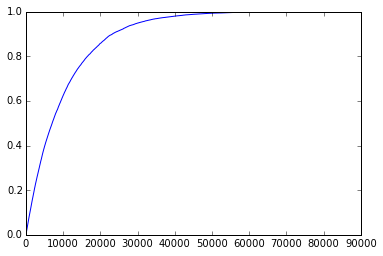

In [7]:
coverage = np.arange(1, s.surface.size+1)/float(s.surface.size)
plt.plot(adsorption_times, coverage, '-')

In [18]:
grad = np.gradient(coverage, adsorption_times)

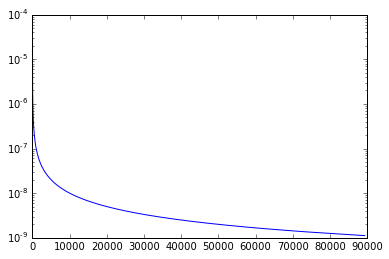

In [24]:
plt.semilogy(adsorption_times, grad)